# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#base URL for API data
url_base = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
url_base2 = "&q="
for_request = url_base + api_key + url_base2

# Looking at sample to determine the dicts and licts in the json file
requests.get(for_request +"republic").json()


{'coord': {'lon': -118.74, 'lat': 48.65},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 41.99,
  'pressure': 1009,
  'humidity': 75,
  'temp_min': 39,
  'temp_max': 45},
 'visibility': 16093,
 'wind': {'speed': 10.29, 'deg': 210},
 'clouds': {'all': 90},
 'dt': 1554574358,
 'sys': {'type': 1,
  'id': 5207,
  'message': 0.0046,
  'country': 'US',
  'sunrise': 1554556947,
  'sunset': 1554604314},
 'id': 5808201,
 'name': 'Republic',
 'cod': 200}

In [5]:
data_cities = []
count = 1
# Enumerate cities
for x in (cities):
    print(f"Processing Record {count} of Set 1 | {x}")
    count += 1 
    data_city = requests.get(for_request + x).json()
    try:
        data_cities.append({"City":x, 
                        "Latitude":data_city["coord"]["lat"],
                        "Temperature":data_city["main"]["temp_max"],
                        "Humidity":data_city["main"]["humidity"],
                        "Cloudiness":data_city["clouds"]["all"],
                        "Wind Speed":data_city["wind"]["speed"],
                       })
    except:
        pass



Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | dunedin
Processing Record 3 of Set 1 | juigalpa
Processing Record 4 of Set 1 | aflu
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | louisbourg
Processing Record 7 of Set 1 | vaitupu
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | dauphin
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | bud
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | seidu
Processing Record 19 of Set 1 | kharp
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Set 1 | clyde river
Processing Record 24 of Set 1 | sataua
Processing Record 25 of Set 1 | tal

Processing Record 198 of Set 1 | tarrafal
Processing Record 199 of Set 1 | sentyabrskiy
Processing Record 200 of Set 1 | tukrah
Processing Record 201 of Set 1 | upata
Processing Record 202 of Set 1 | umzimvubu
Processing Record 203 of Set 1 | vila velha
Processing Record 204 of Set 1 | tabiauea
Processing Record 205 of Set 1 | huayang
Processing Record 206 of Set 1 | narsaq
Processing Record 207 of Set 1 | port keats
Processing Record 208 of Set 1 | katsuura
Processing Record 209 of Set 1 | oyama
Processing Record 210 of Set 1 | kaihua
Processing Record 211 of Set 1 | marquette
Processing Record 212 of Set 1 | great bend
Processing Record 213 of Set 1 | airai
Processing Record 214 of Set 1 | ponta do sol
Processing Record 215 of Set 1 | nioro
Processing Record 216 of Set 1 | sotnikovo
Processing Record 217 of Set 1 | chapleau
Processing Record 218 of Set 1 | tuatapere
Processing Record 219 of Set 1 | westport
Processing Record 220 of Set 1 | bambous virieux
Processing Record 221 of Set

Processing Record 394 of Set 1 | conde
Processing Record 395 of Set 1 | hof
Processing Record 396 of Set 1 | dangara
Processing Record 397 of Set 1 | gushi
Processing Record 398 of Set 1 | ngukurr
Processing Record 399 of Set 1 | salalah
Processing Record 400 of Set 1 | margate
Processing Record 401 of Set 1 | gazli
Processing Record 402 of Set 1 | korla
Processing Record 403 of Set 1 | huarmey
Processing Record 404 of Set 1 | cumberland
Processing Record 405 of Set 1 | batagay-alyta
Processing Record 406 of Set 1 | praia da vitoria
Processing Record 407 of Set 1 | sandwick
Processing Record 408 of Set 1 | hamilton
Processing Record 409 of Set 1 | dikson
Processing Record 410 of Set 1 | pembroke
Processing Record 411 of Set 1 | tuntum
Processing Record 412 of Set 1 | coruripe
Processing Record 413 of Set 1 | faanui
Processing Record 414 of Set 1 | kigorobya
Processing Record 415 of Set 1 | saint anthony
Processing Record 416 of Set 1 | esperance
Processing Record 417 of Set 1 | houma
P

Processing Record 590 of Set 1 | bannu
Processing Record 591 of Set 1 | corowa
Processing Record 592 of Set 1 | sanmenxia
Processing Record 593 of Set 1 | marsabit
Processing Record 594 of Set 1 | manokwari
Processing Record 595 of Set 1 | redondela
Processing Record 596 of Set 1 | gamba


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#DataFrame
data_df = pd.DataFrame(data_cities)
data_df.head()
data_df.to_csv("./city_data.csv", index = None, header = True)
#Save as csv

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

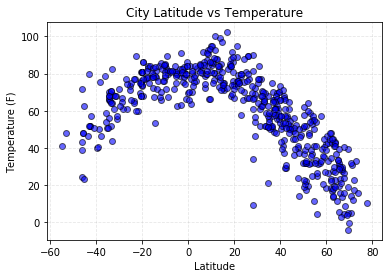

R-sq: 0.36678795575776096


LinregressResult(slope=-0.40914883318651857, intercept=68.14051260946238, rvalue=-0.6056302137094557, pvalue=1.84566715423069e-54, stderr=0.02337332679952605)

<Figure size 432x288 with 0 Axes>

In [20]:
#Scatter Plot
plt.scatter(data_df["Latitude"],data_df["Temperature"], marker="o", color="blue", edgecolors="black", alpha=0.6)
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle="--", alpha=0.3)
plt.show()
plt.savefig("./Temp_Latitude.png")

#LinearReg
slope_tem, intercept_tem, r_value_tem, p_value_tem, std_err_tem = stats.linregress(data_df["Latitude"],data_df["Temperature"])
print(f"R-sq: {r_value_tem*r_value_tem}")
stats.linregress(data_df["Latitude"],data_df["Temperature"])

#### Latitude vs. Humidity Plot

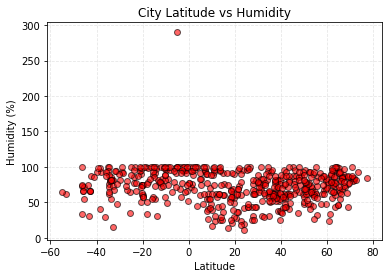

R-sq: 0.011446699516367244


LinregressResult(slope=-0.07433148327271573, intercept=74.06249829358559, rvalue=-0.10698924953642419, pvalue=0.01363745536760115, stderr=0.030033425369473035)

<Figure size 432x288 with 0 Axes>

In [19]:
#Scatter Plot
plt.scatter(data_df["Latitude"],data_df["Humidity"], marker="o", color="red", edgecolors="black", alpha=0.6)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle="--", alpha=0.3)
plt.show()
plt.savefig("./Hum_Latitude.png")

#LinearReg
slope_tem, intercept_tem, r_value_tem, p_value_tem, std_err_tem = stats.linregress(data_df["Latitude"],data_df["Humidity"])
print(f"R-sq: {r_value_tem*r_value_tem}")
stats.linregress(data_df["Latitude"],data_df["Humidity"])

#### Latitude vs. Cloudiness Plot

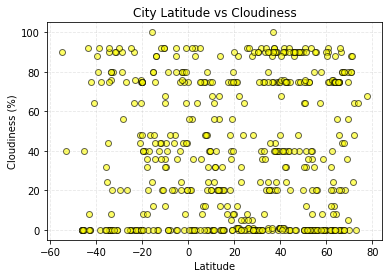

R-sq: 0.0031485498872749094


LinregressResult(slope=0.05951116771095592, intercept=38.46206352799079, rvalue=0.05611194068355602, pvalue=0.1967098695081151, stderr=0.04603949687629406)

<Figure size 432x288 with 0 Axes>

In [17]:
#Scatter Plot
plt.scatter(data_df["Latitude"],data_df["Cloudiness"], marker="o", color="yellow", edgecolors="black", alpha=0.6)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="--", alpha=0.3)
plt.show()
plt.savefig("./Cloud_Latitude.png")

#LinearReg
slope_tem, intercept_tem, r_value_tem, p_value_tem, std_err_tem = stats.linregress(data_df["Latitude"],data_df["Cloudiness"])
print(f"R-sq: {r_value_tem*r_value_tem}")
stats.linregress(data_df["Latitude"],data_df["Cloudiness"])

#### Latitude vs. Wind Speed Plot

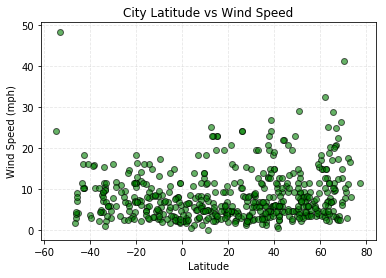

R-sq: 0.00944652528271172


LinregressResult(slope=0.01804904199826715, intercept=7.982071709028313, rvalue=0.09719323681569474, pvalue=0.025110856327563717, stderr=0.008035802174369729)

<Figure size 432x288 with 0 Axes>

In [16]:
#Scatter Plot
plt.scatter(data_df["Latitude"],data_df["Wind Speed"], marker="o", color="green", edgecolors="black", alpha=0.6)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle="--", alpha=0.3)
plt.show()
plt.savefig("./Wind_Latitude.png")

#LinearReg
slope_tem, intercept_tem, r_value_tem, p_value_tem, std_err_tem = stats.linregress(data_df["Latitude"],data_df["Wind Speed"])
print(f"R-sq: {r_value_tem*r_value_tem}")
stats.linregress(data_df["Latitude"],data_df["Wind Speed"])

In [11]:
# A N A L Y S I S

# 1. Based on the ANOVA (pvalue) there a stong correlation between Temperature
# of the city and the latitude they're in.

# 2. Data on Wind Speed and Cloudiness do not have any correlation to 
# Latitude.

# 3. All the data did not have a good r-sq value. This means that whether 
# the correlations of different factors with Latitude are significant or 
# not, the data obtained are not enough or reliable enough to used for
# prediction of certain factors. 